In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
train=pd.read_csv(r'C:\Users\Samals1\stratascratch\datasets\datasets\AMZN_train.csv')
val=pd.read_csv(r'C:\Users\Samals1\stratascratch\datasets\datasets\AMZN_val.csv')
test=pd.read_csv(r'C:\Users\Samals1\stratascratch\datasets\datasets\AMZN_test.csv')

In [3]:
train.shape

(4781, 7)

In [4]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [5]:
train['Date'].max(),train['Date'].min()

('2016-05-13', '1997-05-15')

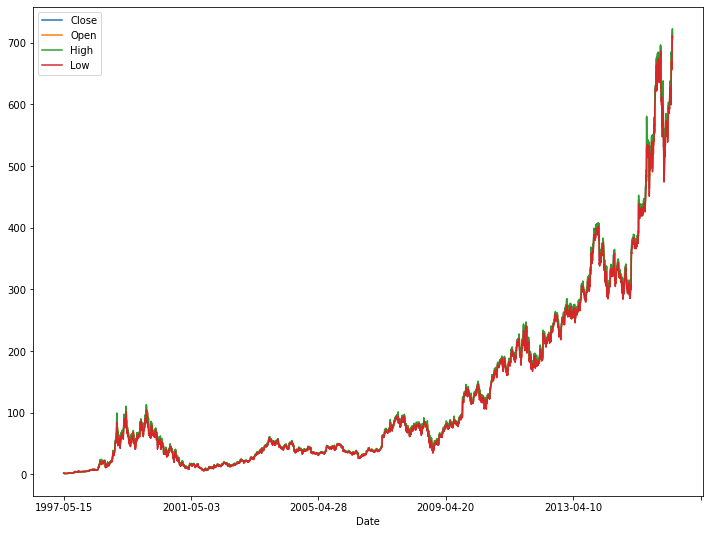

In [6]:
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (12, 9)
_ = train.plot(x="Date", y=["Close", "Open", "High", "Low"])

In [7]:
def analyse(dataframe):
    """Runs an exploration analysis of the dataframe."""
    print("Shape", dataframe.shape, "\n")
    print("Columns", dataframe.columns, "\n")
    dataframe.info()
    print("\n", dataframe.describe(), "\n")
    print("The data ranges from", dataframe["Date"].min(), "to", dataframe["Date"].max())
    dataframe.plot(x="Date", y=["Close", "Open", "High", "Low"])

Shape (503, 7) 

Columns Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       503 non-null    object 
 1   Open       503 non-null    float64
 2   High       503 non-null    float64
 3   Low        503 non-null    float64
 4   Close      503 non-null    float64
 5   Adj Close  503 non-null    float64
 6   Volume     503 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 27.6+ KB

               Open         High          Low        Close    Adj Close  \
count   503.000000   503.000000   503.000000   503.000000   503.000000   
mean    992.201292   999.898131   982.574513   991.828966   991.828966   
std     255.496588   259.220381   250.100614   254.885469   254.885469   
min     689.559998   696.820007   682.119995   691.359985   6

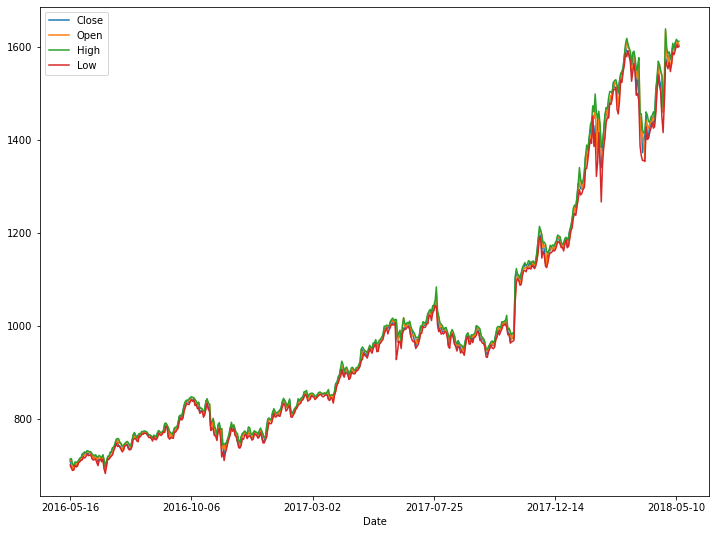

In [8]:
analyse(val)

Shape (504, 7) 

Columns Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       504 non-null    object 
 1   Open       504 non-null    float64
 2   High       504 non-null    float64
 3   Low        504 non-null    float64
 4   Close      504 non-null    float64
 5   Adj Close  504 non-null    float64
 6   Volume     504 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 27.7+ KB

               Open         High          Low        Close    Adj Close  \
count   504.000000   504.000000   504.000000   504.000000   504.000000   
mean   1823.927758  1843.069246  1803.067065  1824.040536  1824.040536   
std     178.129809   179.294163   177.457741   178.470078   178.470078   
min    1346.000000  1396.030029  1307.000000  1343.959961  13

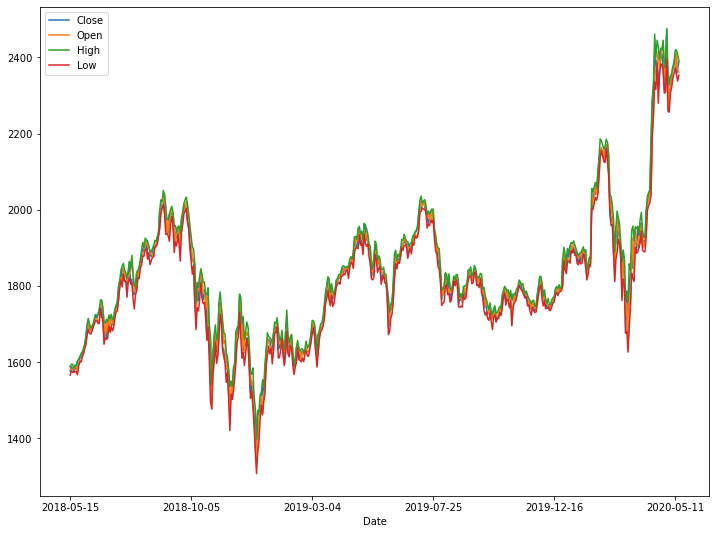

In [9]:
analyse(test)

The task was to predict if the next day's closing price will be higher than the opening price. We do not have that information explicitly in our data, so we have to infer it.

This is relatively simple, we just need to compare the closing and opening prices one day in advance.

To achieve that, first, we will make sure that the data is sorted by the date. We can use the sort_values method and pass in the Date column as a parameter, sorting it in ascending order.

Next, we need to shift the DataFrame by one row / one day and compare the prices. Pandas has a method for doing exactly that, the shift method. We specify a period of minus one (so that we shift the data from the next day back). Because it is a logical operation, Pandas would return a True / False result for each comparison. We want this to be presented as 1 / 0 for the machine learning models, so we will map it to type int. To store all of this information, we will create a new column, called Target.

In [10]:
# make sure that our data is sorted by date
train.sort_values(by="Date", inplace=True)
val.sort_values(by="Date", inplace=True)
test.sort_values(by="Date", inplace=True)
# notice that we shift by a period of '-1', this takes the next day's price direction for the current day
# a positive period will take the days from the past
train["Target"] = (train["Close"] > train["Open"]).shift(periods=-1, fill_value=0).astype(int)

In [11]:
train["Target"].value_counts()

1    2392
0    2389
Name: Target, dtype: int64

In [12]:
val["Target"] = (val["Close"] > val["Open"]).shift(periods=-1, fill_value=0).astype(int)
val["Target"].value_counts()

0    255
1    248
Name: Target, dtype: int64

In [13]:
test["Target"] = (test["Close"] > test["Open"]).shift(periods=-1, fill_value=0).astype(int)
test["Target"].value_counts()

1    255
0    249
Name: Target, dtype: int64

bullish-high,close,open,low
bearish-high,open,close,low

Time Frame	Open	High	Low	Close	No of Candles
Monthly	The opening price on the first day of the month	The highest price at which the stock traded during the entire month	The lowest price at which the stock traded during the entire month	The closing price on the last day of the month	12 candles for the entire year
Weekly	Monday’s Opening Price	The highest price at which the stock traded during the entire week	The lowest price at which the stock traded during the entire week	The closing price on Friday	52 candles for the entire year

In [14]:
train['day_bull_or_bear']=np.where(((train['High']>=train['Close']) & (train['Open']>=train['Low']) & (train['Close']> train['Open'])),'bullish','Doji')

In [15]:
train['month_year'] = pd.to_datetime(train['Date']).dt.to_period('M')

In [16]:
train['Date_dt']=pd.to_datetime(train['Date']).dt.day

In [17]:
train['Week_of_year']=pd.to_datetime(train['Date']).dt.week

<ipython-input-17-820b5d62bf01>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  train['Week_of_year']=pd.to_datetime(train['Date']).dt.week


In [18]:
train['year']=pd.to_datetime(train['Date']).dt.year

In [19]:
train['dayofweek']=pd.to_datetime(train['Date']).dt.dayofweek

In [20]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Target,day_bull_or_bear,month_year,Date_dt,Week_of_year,year,dayofweek
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,0,Doji,1997-05,15,20,1997,3
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,0,Doji,1997-05,16,20,1997,4
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,0,Doji,1997-05,19,21,1997,0
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,0,Doji,1997-05,20,21,1997,1
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,0,Doji,1997-05,21,21,1997,2


In [21]:
monthly_first_dt=train.groupby(['month_year'])['Date_dt'].agg(['min'])['min']
train['monthly_first_dt']=train['month_year'].map(monthly_first_dt)
monthly_last_dt=train.groupby(['month_year'])['Date_dt'].agg(['max'])['max']
train['monthly_last_dt']=train['month_year'].map(monthly_last_dt)
monthly_high=train.groupby(['month_year'])['High'].agg(['min'])['min']
train['monthly_high']=train['month_year'].map(monthly_high)
monthly_low=train.groupby(['month_year'])['Low'].agg(['max'])['max']
train['monthly_low']=train['month_year'].map(monthly_low)

In [22]:
weekly_first_dt=train.groupby(['year','Week_of_year'])['dayofweek'].agg(['min']).reset_index().rename(columns={'min':'weekly_first_dt'})
train=pd.merge(train,weekly_first_dt,on=['year','Week_of_year'],how='left')
weekly_last_dt=train.groupby(['year','Week_of_year'])['dayofweek'].agg(['max']).reset_index().rename(columns={'max':'weekly_last_dt'})
train=pd.merge(train,weekly_last_dt,on=['year','Week_of_year'],how='left')
weekly_high=train.groupby(['year','Week_of_year'])['High'].agg(['min']).reset_index().rename(columns={'min':'weekly_high'})
train=pd.merge(train,weekly_high,on=['year','Week_of_year'],how='left')
weekly_low=train.groupby(['year','Week_of_year'])['Low'].agg(['max']).reset_index().rename(columns={'max':'weekly_low'})
train=pd.merge(train,weekly_low,on=['year','Week_of_year'],how='left')

In [23]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Target,day_bull_or_bear,month_year,...,year,dayofweek,monthly_first_dt,monthly_last_dt,monthly_high,monthly_low,weekly_first_dt,weekly_last_dt,weekly_high,weekly_low
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,0,Doji,1997-05,...,1997,3,15,30,1.447917,1.927083,3,4,1.979167,1.927083
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,0,Doji,1997-05,...,1997,4,15,30,1.447917,1.927083,3,4,1.979167,1.927083
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,0,Doji,1997-05,...,1997,0,15,30,1.447917,1.927083,0,4,1.447917,1.635417
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,0,Doji,1997-05,...,1997,1,15,30,1.447917,1.927083,0,4,1.447917,1.635417
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,0,Doji,1997-05,...,1997,2,15,30,1.447917,1.927083,0,4,1.447917,1.635417


In [24]:
train['monthly_first_dt_flag']=np.where(train['monthly_first_dt']==train['Date_dt'],'Yes','No')
train['weekly_first_dt_flag']=np.where(train['weekly_first_dt']==train['dayofweek'],'Yes','No')
train['monthly_last_dt_flag']=np.where(train['monthly_last_dt']==train['Date_dt'],'Yes','No')
train['weekly_last_dt_flag']=np.where(train['weekly_last_dt']==train['dayofweek'],'Yes','No')

In [25]:
train['monthly_open']=np.where(train['monthly_first_dt_flag']=='Yes',train['Open'],0)
monthly_open_price=train.groupby(['month_year'])['monthly_open'].agg(['sum'])['sum']
train['monthly_open_price']=train['month_year'].map(monthly_open_price)

train['monthly_close']=np.where(train['monthly_last_dt_flag']=='Yes',train['Close'],0)
monthly_close_price=train.groupby(['month_year'])['monthly_close'].agg(['sum'])['sum']
train['monthly_close_price']=train['month_year'].map(monthly_close_price)

train['weekly_open']=np.where(train['weekly_first_dt_flag']=='Yes',train['Open'],0)
weekly_open_price=train.groupby(['year','Week_of_year'])['weekly_open'].agg(['sum'])['sum'].reset_index().rename(columns={'sum':'weekly_open_price'})
train=pd.merge(train,weekly_open_price,on=['year','Week_of_year'],how='left')

train['weekly_close']=np.where(train['weekly_last_dt_flag']=='Yes',train['Close'],0)
weekly_close_price=train.groupby(['year','Week_of_year'])['weekly_close'].agg(['sum'])['sum'].reset_index().rename(columns={'sum':'weekly_close_price'})
train=pd.merge(train,weekly_close_price,on=['year','Week_of_year'],how='left')

train['Date']=pd.to_datetime(train['Date'])

train['Day_change']=train['Close']-train['Open']
train['Price_change']=train['High']-train['Low']

train['day_rolling_diff_high']=train['High'].diff()
train['day_rolling_diff_low']=train['Low'].diff()

train['day_trend']=np.where(((train['day_rolling_diff_high']<0 ) & (train['day_rolling_diff_low']<0)),'downtrend','indesicive')
train['day_trend']=np.where(((train['day_rolling_diff_high']>0 ) & (train['day_rolling_diff_low']>0)),'uptrend',train['day_trend'])

train['SMA3']=train['Day_change'].rolling(window=3, min_periods=1).mean()
train['SMA7']=train['Day_change'].rolling(window=7, min_periods=1).mean()
train['EMA9'] = train['Day_change'].ewm(span=9).mean()
train['EMA21'] = train['Day_change'].ewm(span=9).mean()



In [26]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Target,day_bull_or_bear,month_year,...,weekly_close_price,Day_change,Price_change,day_rolling_diff_high,day_rolling_diff_low,day_trend,SMA3,SMA7,EMA9,EMA21
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,0,Doji,1997-05,...,1.729167,-0.479167,0.572917,NaN,NaN,indesicive,-0.479167,-0.479167,-0.479167,-0.479167
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,0,Doji,1997-05,...,1.729167,-0.239583,0.270834,-0.520833,-0.218750,downtrend,-0.359375,-0.359375,-0.346065,-0.346065
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,0,Doji,1997-05,...,1.500000,-0.052084,0.145833,-0.208334,-0.083333,downtrend,-0.256945,-0.256945,-0.225581,-0.225581
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,0,Doji,1997-05,...,1.500000,-0.093750,0.114583,-0.020833,0.010417,indesicive,-0.128472,-0.216146,-0.180923,-0.180923
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,0,Doji,1997-05,...,1.500000,-0.208334,0.270833,-0.104167,-0.260417,downtrend,-0.118056,-0.214584,-0.189077,-0.189077


In [27]:
train['weekly_bull_or_bear']=np.where(((train['weekly_high']>=train['weekly_close_price']) & (train['weekly_open_price']>=train['weekly_low']) & (train['weekly_close_price']> train['weekly_open_price'])),'bullish','Doji')
train['monthly_bull_or_bear']=np.where(((train['monthly_high']>=train['monthly_close_price']) & (train['monthly_open_price']>=train['monthly_low']) & (train['monthly_close_price']> train['monthly_open_price'])),'bullish','Doji')
train['weekly_bull_or_bear']=np.where(((train['weekly_high']>=train['weekly_open_price']) & (train['weekly_close_price']>=train['weekly_low']) & (train['weekly_open_price']> train['weekly_close_price'])),'bearish',train['weekly_bull_or_bear'])
train['monthly_bull_or_bear']=np.where(((train['monthly_high']>=train['monthly_open_price']) & (train['monthly_close_price']>=train['monthly_low']) & (train['monthly_open_price']> train['monthly_close_price'])),'bearish',train['monthly_bull_or_bear'])

In [28]:
train['day_bull_or_bear'].value_counts()

bullish    2392
Doji       2389
Name: day_bull_or_bear, dtype: int64

In [29]:
train['day_bull_or_bear']=np.where(((train['High']>=train['Open']) & (train['Close']>=train['Low']) & (train['Open']> train['Close'])),'bearish',train['day_bull_or_bear'])

In [30]:
train['day_bull_or_bear'].value_counts()

bullish    2392
bearish    2355
Doji         34
Name: day_bull_or_bear, dtype: int64

In [31]:
train.loc[train['day_bull_or_bear']=='Doji']

,Date,Open,High,Low,Close,Adj Close,Volume,Target,day_bull_or_bear,month_year,...,Price_change,day_rolling_diff_high,day_rolling_diff_low,day_trend,SMA3,SMA7,EMA9,EMA21,weekly_bull_or_bear,monthly_bull_or_bear
10,1997-05-30,1.500000,1.510417,1.479167,1.500000,1.500000,2594400,0,Doji,1997-05,...,0.031250,-0.031250,0.000000,indesicive,-4.340300e-02,-0.030506,-0.042382,-0.042382,Doji,Doji
11,1997-06-02,1.510417,1.531250,1.500000,1.510417,1.510417,591600,0,Doji,1997-06,...,0.031250,0.020833,0.020833,uptrend,-1.215300e-02,-0.000744,-0.033280,-0.033280,Doji,Doji
24,1997-06-19,1.510417,1.531250,1.500000,1.510417,1.510417,1003200,0,Doji,1997-06,...,0.031250,-0.005208,0.000000,indesicive,-3.472200e-02,-0.029762,-0.022960,-0.022960,Doji,Doji
148,1997-12-15,4.583333,4.666667,4.406250,4.583333,4.583333,1694400,0,Doji,1997-12,...,0.260417,-0.135416,0.000000,indesicive,6.250033e-02,0.065476,0.040095,0.040095,Doji,Doji
182,1998-02-04,5.062500,5.187500,5.052083,5.062500,5.062500,1234800,0,Doji,1998-02,...,0.135417,-0.062500,-0.041667,downtrend,7.118067e-02,0.035714,0.017701,0.017701,Doji,Doji
187,1998-02-11,5.291667,5.463542,5.281250,5.291667,5.291667,6474000,0,Doji,1998-02,...,0.182292,0.145834,0.447917,uptrend,1.215277e-01,0.018601,0.049494,0.049494,Doji,Doji
213,1998-03-20,7.000000,7.072917,6.927083,7.000000,7.000000,6412800,1,Doji,1998-03,...,0.145834,-0.218750,-0.052084,downtrend,1.302083e-01,0.036458,0.049083,0.049083,Doji,Doji
219,1998-03-30,7.156250,7.291667,7.093750,7.156250,7.156250,5500800,1,Doji,1998-03,...,0.197917,0.031250,0.197917,uptrend,4.861100e-02,0.005208,0.018579,0.018579,Doji,Doji
246,1998-05-07,7.583333,7.750000,7.354167,7.583333,7.583333,13887600,1,Doji,1998-05,...,0.395833,-0.083333,-0.156250,downtrend,-1.085067e-01,-0.111979,-0.083342,-0.083342,Doji,Doji
298,1998-07-22,22.333332,23.312500,21.750000,22.333332,22.333332,27974400,0,Doji,1998-07,...,1.562500,-1.187500,0.416668,indesicive,6.215287e-01,0.513393,0.388989,0.388989,Doji,Doji


In [32]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Target,day_bull_or_bear,month_year,...,Price_change,day_rolling_diff_high,day_rolling_diff_low,day_trend,SMA3,SMA7,EMA9,EMA21,weekly_bull_or_bear,monthly_bull_or_bear
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,0,bearish,1997-05,...,0.572917,NaN,NaN,indesicive,-0.479167,-0.479167,-0.479167,-0.479167,Doji,Doji
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,0,bearish,1997-05,...,0.270834,-0.520833,-0.218750,downtrend,-0.359375,-0.359375,-0.346065,-0.346065,Doji,Doji
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,0,bearish,1997-05,...,0.145833,-0.208334,-0.083333,downtrend,-0.256945,-0.256945,-0.225581,-0.225581,Doji,Doji
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,0,bearish,1997-05,...,0.114583,-0.020833,0.010417,indesicive,-0.128472,-0.216146,-0.180923,-0.180923,Doji,Doji
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,0,bearish,1997-05,...,0.270833,-0.104167,-0.260417,downtrend,-0.118056,-0.214584,-0.189077,-0.189077,Doji,Doji


In [33]:
train['Date']=pd.to_datetime(train['Date'])

In [34]:
train['Day_change']=train['Close']-train['Open']
train['Price_change']=train['High']-train['Low']

In [35]:
train['day_rolling_diff_high']=train['High'].diff()
train['day_rolling_diff_low']=train['Low'].diff()

In [36]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Target,day_bull_or_bear,month_year,...,Price_change,day_rolling_diff_high,day_rolling_diff_low,day_trend,SMA3,SMA7,EMA9,EMA21,weekly_bull_or_bear,monthly_bull_or_bear
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,0,bearish,1997-05,...,0.572917,NaN,NaN,indesicive,-0.479167,-0.479167,-0.479167,-0.479167,Doji,Doji
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,0,bearish,1997-05,...,0.270834,-0.520833,-0.218750,downtrend,-0.359375,-0.359375,-0.346065,-0.346065,Doji,Doji
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,0,bearish,1997-05,...,0.145833,-0.208334,-0.083333,downtrend,-0.256945,-0.256945,-0.225581,-0.225581,Doji,Doji
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,0,bearish,1997-05,...,0.114583,-0.020833,0.010417,indesicive,-0.128472,-0.216146,-0.180923,-0.180923,Doji,Doji
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,0,bearish,1997-05,...,0.270833,-0.104167,-0.260417,downtrend,-0.118056,-0.214584,-0.189077,-0.189077,Doji,Doji


uptrend: higher high, higher low
downtred: lower high, lower low
notrend:same high, same lower    

In [37]:
train['day_trend']=np.where(((train['day_rolling_diff_high']<0 ) & (train['day_rolling_diff_low']<0)),'downtrend','indesicive')
train['day_trend']=np.where(((train['day_rolling_diff_high']>0 ) & (train['day_rolling_diff_low']>0)),'uptrend',train['day_trend'])

In [38]:
train['day_trend'].value_counts()

uptrend       1901
downtrend     1771
indesicive    1109
Name: day_trend, dtype: int64

Rule 1) Buy (go long) when the current market price turns greater than the 50 days EMA. Once you go long, you should stay invested till the necessary sell condition is satisfied.

Rule 2) Exit the long position (square off) when the current market price turns lesser than the 50 days EMA.

Moving averages works brilliantly when there is a trend and fails to perform when the stock moves sideways. This basically means the ‘Moving average’ in its simplest form is a trend following system.
A moving average crossover system is an improvisation over the plain vanilla moving average system. It helps the trader to take fewer trades in a sideways market.
A typical example of this would be to combine a 50 day EMA, with a 100 day EMA. The shorter moving average (50 days in this case) is also referred to as the faster-moving average. The longer moving average (100 days moving average) is referred to as the slower moving average.
The shorter moving average takes a lesser number of data points to calculate the average, and hence it tends to stick closer to the current market price and therefore reacts more quickly. A longer moving average takes more data points to calculate the average, and hence it tends to stay away from the current market price. Hence the reactions are slower.
The entry and exit rules for the crossover system is as stated below:

Rule 1) – Buy (fresh long) when the short term moving averages turns greater than the long term moving average. Stay in the trade as long as this condition is satisfied

Rule 2) – Exit the long position (square off) when the short term moving average turns lesser than the longer-term moving average
A trader can use any combination to create a MA cross over system. Some of the popular combinations for a swing trader would be:

9 day EMA with 21 days EMA – use this for short term trades ( upto few trading session)
25 day EMA with 50 days EMA – use this to identify medium-term trade (upto few weeks)
50 day EMA with 100 Day EMA – use this to identify trades that lasts upto few months
100 day EMA with 200 days EMA – use this to identify long term trades (investment opportunities), some of them can even last for over a year or more.

In [39]:
train['SMA3']=train['Day_change'].rolling(window=3, min_periods=1).mean()
train['SMA7']=train['Day_change'].rolling(window=7, min_periods=1).mean()
train['EMA9'] = train['Day_change'].ewm(span=9).mean()
train['EMA21'] = train['Day_change'].ewm(span=9).mean()

High Volume = Today’s volume > last 10 days average volume
Low Volume = Today’s volume < last 10 days average volume
Average Volume = Today’s volume = last 10 days average volume

If both the price and the volume are increasing this only means one thing – a big player is showing interest in the stock. Going by the assumption that smart money always makes smart choices, the expectation turns bullish, and hence one should look at buying opportunity in the stock.
What do you think happens when the price increases but the volume decreases as indicated in the 2nd row?

Think about it on the following terms:

Why is the price increasing?
Because market participants are buying
Are there any institutional buyers associated with the price increase?
Not likely
How would you know that there is no meaningful purchase by institutional investors?
Simple, if they were buying, then the volumes would have increased and not decrease.
So what does a price increase, associated by decreasing volumes indicate?
It means the price is increasing because of small retail participation and not really influential buying. Hence it would help if you were cautious as this could be a possible bull trap.
Going forward, the 3rd row says, a decrease in price along with an increase in volume sets a bearish expectation. Why do you think so?

A price decrease indicates that market participants are selling the stock. Increase in volumes indicates the presence of smart money. Both events occurring together (decrease in price + increase in volumes) imply that smart money is selling stocks. Going by the assumption that smart money always makes smart choices, the expectation is bearish, and hence one should look at selling opportunity in the stock.

Or as a corollary, whenever you decide to sell, ensure that the volumes are good. This means that you too, are selling, along with the smart money.

Moving forward, what do you think happens when both volume and price decrease as indicated in the 4th row?

Think about it in on following terms:

Why is the price decreasing?
Because market participants are selling.
Are there any institutional sellers associated with the price decrease?
Not likely
How would you know that there are no meaningful sell orders by institutional investors?
Simple, if they were selling, then the volume would increase and not decrease.
So how would you infer a decline in price and a decline in volume?
It means the price decreases because of small retail participation, and not really influential (read as smart money) selling. Hence it would help if you were cautious as this could be a possible bear trap.

In [40]:
train['SMA10_Volume']=train['Volume'].rolling(window=10, min_periods=1).mean()
train['Vol_high_low']=np.where(train['Volume']>train['SMA10_Volume'],'High Volume', np.where(train['Volume']<train['SMA10_Volume'],'Low Volume','Average Volume'))

Marubozu:can appear anywhere in the chart irrespective of the prior trend
Bullish Marubozu:Open = Low and High = close
It does not matter what the prior trend has been, the action on the marubozu day suggests that the sentiment has changed and the stock is now bullish.
The expectation is that with this sudden change in sentiment, there is a surge of bullishness, and this bullish sentiment will continue over the next few trading sessions. Hence a trader should look at buying opportunities with the occurrence of a bullish marubozu.


In [41]:
val['day_bull_or_bear']=np.where(((val['High']>=val['Close']) & (val['Open']>=val['Low']) & (val['Close']> val['Open'])),'bullish','Doji')
val['month_year'] = pd.to_datetime(val['Date']).dt.to_period('M')
val['Date_dt']=pd.to_datetime(val['Date']).dt.day
val['Week_of_year']=pd.to_datetime(val['Date']).dt.week
val['year']=pd.to_datetime(val['Date']).dt.year
val['dayofweek']=pd.to_datetime(val['Date']).dt.dayofweek
monthly_first_dt=val.groupby(['month_year'])['Date_dt'].agg(['min'])['min']
val['monthly_first_dt']=val['month_year'].map(monthly_first_dt)
monthly_last_dt=val.groupby(['month_year'])['Date_dt'].agg(['max'])['max']
val['monthly_last_dt']=val['month_year'].map(monthly_last_dt)
monthly_high=val.groupby(['month_year'])['High'].agg(['min'])['min']
val['monthly_high']=val['month_year'].map(monthly_high)
monthly_low=val.groupby(['month_year'])['Low'].agg(['max'])['max']
val['monthly_low']=val['month_year'].map(monthly_low)
weekly_first_dt=val.groupby(['year','Week_of_year'])['dayofweek'].agg(['min']).reset_index().rename(columns={'min':'weekly_first_dt'})
val=pd.merge(val,weekly_first_dt,on=['year','Week_of_year'],how='left')
weekly_last_dt=val.groupby(['year','Week_of_year'])['dayofweek'].agg(['max']).reset_index().rename(columns={'max':'weekly_last_dt'})
val=pd.merge(val,weekly_last_dt,on=['year','Week_of_year'],how='left')
weekly_high=val.groupby(['year','Week_of_year'])['High'].agg(['min']).reset_index().rename(columns={'min':'weekly_high'})
val=pd.merge(val,weekly_high,on=['year','Week_of_year'],how='left')
weekly_low=val.groupby(['year','Week_of_year'])['Low'].agg(['max']).reset_index().rename(columns={'max':'weekly_low'})
val=pd.merge(val,weekly_low,on=['year','Week_of_year'],how='left')
val['monthly_first_dt_flag']=np.where(val['monthly_first_dt']==val['Date_dt'],'Yes','No')
val['weekly_first_dt_flag']=np.where(val['weekly_first_dt']==val['dayofweek'],'Yes','No')
val['monthly_last_dt_flag']=np.where(val['monthly_last_dt']==val['Date_dt'],'Yes','No')
val['weekly_last_dt_flag']=np.where(val['weekly_last_dt']==val['dayofweek'],'Yes','No')
val['monthly_open']=np.where(val['monthly_first_dt_flag']=='Yes',val['Open'],0)
monthly_open_price=val.groupby(['month_year'])['monthly_open'].agg(['sum'])['sum']
val['monthly_open_price']=val['month_year'].map(monthly_open_price)

val['monthly_close']=np.where(val['monthly_last_dt_flag']=='Yes',val['Close'],0)
monthly_close_price=val.groupby(['month_year'])['monthly_close'].agg(['sum'])['sum']
val['monthly_close_price']=val['month_year'].map(monthly_close_price)

val['weekly_open']=np.where(val['weekly_first_dt_flag']=='Yes',val['Open'],0)
weekly_open_price=val.groupby(['year','Week_of_year'])['weekly_open'].agg(['sum'])['sum'].reset_index().rename(columns={'sum':'weekly_open_price'})
val=pd.merge(val,weekly_open_price,on=['year','Week_of_year'],how='left')

val['weekly_close']=np.where(val['weekly_last_dt_flag']=='Yes',val['Close'],0)
weekly_close_price=val.groupby(['year','Week_of_year'])['weekly_close'].agg(['sum'])['sum'].reset_index().rename(columns={'sum':'weekly_close_price'})
val=pd.merge(val,weekly_close_price,on=['year','Week_of_year'],how='left')

val['weekly_bull_or_bear']=np.where(((val['weekly_high']>=val['weekly_close_price']) & (val['weekly_open_price']>=val['weekly_low']) & (val['weekly_close_price']> val['weekly_open_price'])),'bullish','Doji')
val['monthly_bull_or_bear']=np.where(((val['monthly_high']>=val['monthly_close_price']) & (val['monthly_open_price']>=val['monthly_low']) & (val['monthly_close_price']> val['monthly_open_price'])),'bullish','Doji')
val['weekly_bull_or_bear']=np.where(((val['weekly_high']>=val['weekly_open_price']) & (val['weekly_close_price']>=val['weekly_low']) & (val['weekly_open_price']> val['weekly_close_price'])),'bearish',val['weekly_bull_or_bear'])
val['monthly_bull_or_bear']=np.where(((val['monthly_high']>=val['monthly_open_price']) & (val['monthly_close_price']>=val['monthly_low']) & (val['monthly_open_price']> val['monthly_close_price'])),'bearish',val['monthly_bull_or_bear'])

val['day_bull_or_bear']=np.where(((val['High']>=val['Open']) & (val['Close']>=val['Low']) & (val['Open']> val['Close'])),'bearish',val['day_bull_or_bear'])

val['Date']=pd.to_datetime(val['Date'])

val['Day_change']=val['Close']-val['Open']
val['Price_change']=val['High']-val['Low']

val['day_rolling_diff_high']=val['High'].diff()
val['day_rolling_diff_low']=val['Low'].diff()

val['day_trend']=np.where(((val['day_rolling_diff_high']<0 ) & (val['day_rolling_diff_low']<0)),'downtrend','indesicive')
val['day_trend']=np.where(((val['day_rolling_diff_high']>0 ) & (val['day_rolling_diff_low']>0)),'uptrend',val['day_trend'])

val['SMA3']=val['Day_change'].rolling(window=3, min_periods=1).mean()
val['SMA7']=val['Day_change'].rolling(window=7, min_periods=1).mean()
val['EMA9'] = val['Day_change'].ewm(span=9).mean()
val['EMA21'] = val['Day_change'].ewm(span=9).mean()

val['SMA10_Volume']=val['Volume'].rolling(window=10, min_periods=1).mean()
val['Vol_high_low']=np.where(val['Volume']>val['SMA10_Volume'],'High Volume', np.where(val['Volume']<val['SMA10_Volume'],'Low Volume','Average Volume'))


<ipython-input-41-30eb5eb3efbf>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  val['Week_of_year']=pd.to_datetime(val['Date']).dt.week


In [42]:
test['day_bull_or_bear']=np.where(((test['High']>=test['Close']) & (test['Open']>=test['Low']) & (test['Close']> test['Open'])),'bullish','Doji')
test['month_year'] = pd.to_datetime(test['Date']).dt.to_period('M')
test['Date_dt']=pd.to_datetime(test['Date']).dt.day
test['Week_of_year']=pd.to_datetime(test['Date']).dt.week
test['year']=pd.to_datetime(test['Date']).dt.year
test['dayofweek']=pd.to_datetime(test['Date']).dt.dayofweek
monthly_first_dt=test.groupby(['month_year'])['Date_dt'].agg(['min'])['min']
test['monthly_first_dt']=test['month_year'].map(monthly_first_dt)
monthly_last_dt=test.groupby(['month_year'])['Date_dt'].agg(['max'])['max']
test['monthly_last_dt']=test['month_year'].map(monthly_last_dt)
monthly_high=test.groupby(['month_year'])['High'].agg(['min'])['min']
test['monthly_high']=test['month_year'].map(monthly_high)
monthly_low=test.groupby(['month_year'])['Low'].agg(['max'])['max']
test['monthly_low']=test['month_year'].map(monthly_low)
weekly_first_dt=test.groupby(['year','Week_of_year'])['dayofweek'].agg(['min']).reset_index().rename(columns={'min':'weekly_first_dt'})
test=pd.merge(test,weekly_first_dt,on=['year','Week_of_year'],how='left')
weekly_last_dt=test.groupby(['year','Week_of_year'])['dayofweek'].agg(['max']).reset_index().rename(columns={'max':'weekly_last_dt'})
test=pd.merge(test,weekly_last_dt,on=['year','Week_of_year'],how='left')
weekly_high=test.groupby(['year','Week_of_year'])['High'].agg(['min']).reset_index().rename(columns={'min':'weekly_high'})
test=pd.merge(test,weekly_high,on=['year','Week_of_year'],how='left')
weekly_low=test.groupby(['year','Week_of_year'])['Low'].agg(['max']).reset_index().rename(columns={'max':'weekly_low'})
test=pd.merge(test,weekly_low,on=['year','Week_of_year'],how='left')
test['monthly_first_dt_flag']=np.where(test['monthly_first_dt']==test['Date_dt'],'Yes','No')
test['weekly_first_dt_flag']=np.where(test['weekly_first_dt']==test['dayofweek'],'Yes','No')
test['monthly_last_dt_flag']=np.where(test['monthly_last_dt']==test['Date_dt'],'Yes','No')
test['weekly_last_dt_flag']=np.where(test['weekly_last_dt']==test['dayofweek'],'Yes','No')
test['monthly_open']=np.where(test['monthly_first_dt_flag']=='Yes',test['Open'],0)
monthly_open_price=test.groupby(['month_year'])['monthly_open'].agg(['sum'])['sum']
test['monthly_open_price']=test['month_year'].map(monthly_open_price)

test['monthly_close']=np.where(test['monthly_last_dt_flag']=='Yes',test['Close'],0)
monthly_close_price=test.groupby(['month_year'])['monthly_close'].agg(['sum'])['sum']
test['monthly_close_price']=test['month_year'].map(monthly_close_price)

test['weekly_open']=np.where(test['weekly_first_dt_flag']=='Yes',test['Open'],0)
weekly_open_price=test.groupby(['year','Week_of_year'])['weekly_open'].agg(['sum'])['sum'].reset_index().rename(columns={'sum':'weekly_open_price'})
test=pd.merge(test,weekly_open_price,on=['year','Week_of_year'],how='left')

test['weekly_close']=np.where(test['weekly_last_dt_flag']=='Yes',test['Close'],0)
weekly_close_price=test.groupby(['year','Week_of_year'])['weekly_close'].agg(['sum'])['sum'].reset_index().rename(columns={'sum':'weekly_close_price'})
test=pd.merge(test,weekly_close_price,on=['year','Week_of_year'],how='left')

test['weekly_bull_or_bear']=np.where(((test['weekly_high']>=test['weekly_close_price']) & (test['weekly_open_price']>=test['weekly_low']) & (test['weekly_close_price']> test['weekly_open_price'])),'bullish','Doji')
test['monthly_bull_or_bear']=np.where(((test['monthly_high']>=test['monthly_close_price']) & (test['monthly_open_price']>=test['monthly_low']) & (test['monthly_close_price']> test['monthly_open_price'])),'bullish','Doji')
test['weekly_bull_or_bear']=np.where(((test['weekly_high']>=test['weekly_open_price']) & (test['weekly_close_price']>=test['weekly_low']) & (test['weekly_open_price']> test['weekly_close_price'])),'bearish',test['weekly_bull_or_bear'])
test['monthly_bull_or_bear']=np.where(((test['monthly_high']>=test['monthly_open_price']) & (test['monthly_close_price']>=test['monthly_low']) & (test['monthly_open_price']> test['monthly_close_price'])),'bearish',test['monthly_bull_or_bear'])

test['day_bull_or_bear']=np.where(((test['High']>=test['Open']) & (test['Close']>=test['Low']) & (test['Open']> test['Close'])),'bearish',test['day_bull_or_bear'])

test['Date']=pd.to_datetime(test['Date'])

test['Day_change']=test['Close']-test['Open']
test['Price_change']=test['High']-test['Low']

test['day_rolling_diff_high']=test['High'].diff()
test['day_rolling_diff_low']=test['Low'].diff()

test['day_trend']=np.where(((test['day_rolling_diff_high']<0 ) & (test['day_rolling_diff_low']<0)),'downtrend','indesicive')
test['day_trend']=np.where(((test['day_rolling_diff_high']>0 ) & (test['day_rolling_diff_low']>0)),'uptrend',test['day_trend'])

test['SMA3']=test['Day_change'].rolling(window=3, min_periods=1).mean()
test['SMA7']=test['Day_change'].rolling(window=7, min_periods=1).mean()
test['EMA9'] = test['Day_change'].ewm(span=9).mean()
test['EMA21'] = test['Day_change'].ewm(span=9).mean()

test['SMA10_Volume']=test['Volume'].rolling(window=10, min_periods=1).mean()
test['Vol_high_low']=np.where(test['Volume']>test['SMA10_Volume'],'High Volume', np.where(test['Volume']<test['SMA10_Volume'],'Low Volume','Average Volume'))


<ipython-input-42-0444f94944b8>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  test['Week_of_year']=pd.to_datetime(test['Date']).dt.week


In [43]:
dummy_day_bull_or_bear_train=pd.get_dummies(train['day_bull_or_bear'])
train=pd.concat([train,dummy_day_bull_or_bear_train],axis=1)
dummy_day_bull_or_bear_val=pd.get_dummies(val['day_bull_or_bear'])
val=pd.concat([val,dummy_day_bull_or_bear_val],axis=1)
dummy_day_bull_or_bear_test=pd.get_dummies(test['day_bull_or_bear'])
test=pd.concat([test,dummy_day_bull_or_bear_test],axis=1)

In [44]:
# dummy_weekly_bull_or_bear_train=pd.get_dummies(train['weekly_bull_or_bear'])
# train=pd.concat([train,dummy_weekly_bull_or_bear_train],axis=1)
# dummy_weekly_bull_or_bear_val=pd.get_dummies(val['weekly_bull_or_bear'])
# val=pd.concat([val,dummy_weekly_bull_or_bear_val],axis=1)
# dummy_weekly_bull_or_bear_test=pd.get_dummies(test['weekly_bull_or_bear'])
# test=pd.concat([test,dummy_weekly_bull_or_bear_test],axis=1)

In [45]:
# dummy_monthly_bull_or_bear_train=pd.get_dummies(train['monthly_bull_or_bear'])
# train=pd.concat([train,dummy_monthly_bull_or_bear_train],axis=1)
# dummy_monthly_bull_or_bear_val=pd.get_dummies(val['monthly_bull_or_bear'])
# val=pd.concat([val,dummy_monthly_bull_or_bear_val],axis=1)
# dummy_monthly_bull_or_bear_test=pd.get_dummies(test['monthly_bull_or_bear'])
# test=pd.concat([test,dummy_monthly_bull_or_bear_test],axis=1)

In [46]:
dummy_day_trend=pd.get_dummies(train['day_trend'])
train=pd.concat([train,dummy_day_trend],axis=1)
dummy_day_bull_or_bear_val=pd.get_dummies(val['day_trend'])
val=pd.concat([val,dummy_day_bull_or_bear_val],axis=1)
dummy_day_bull_or_bear_test=pd.get_dummies(test['day_trend'])
test=pd.concat([test,dummy_day_bull_or_bear_test],axis=1)

In [47]:
dummy_Vol_high_low=pd.get_dummies(train['Vol_high_low'])
train=pd.concat([train,dummy_Vol_high_low],axis=1)
dummy_day_bull_or_bear_val=pd.get_dummies(val['Vol_high_low'])
val=pd.concat([val,dummy_day_bull_or_bear_val],axis=1)
dummy_day_bull_or_bear_test=pd.get_dummies(test['Vol_high_low'])
test=pd.concat([test,dummy_day_bull_or_bear_test],axis=1)

In [48]:
train.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Target',
       'day_bull_or_bear', 'month_year', 'Date_dt', 'Week_of_year', 'year',
       'dayofweek', 'monthly_first_dt', 'monthly_last_dt', 'monthly_high',
       'monthly_low', 'weekly_first_dt', 'weekly_last_dt', 'weekly_high',
       'weekly_low', 'monthly_first_dt_flag', 'weekly_first_dt_flag',
       'monthly_last_dt_flag', 'weekly_last_dt_flag', 'monthly_open',
       'monthly_open_price', 'monthly_close', 'monthly_close_price',
       'weekly_open', 'weekly_open_price', 'weekly_close',
       'weekly_close_price', 'Day_change', 'Price_change',
       'day_rolling_diff_high', 'day_rolling_diff_low', 'day_trend', 'SMA3',
       'SMA7', 'EMA9', 'EMA21', 'weekly_bull_or_bear', 'monthly_bull_or_bear',
       'SMA10_Volume', 'Vol_high_low', 'Doji', 'bearish', 'bullish',
       'downtrend', 'indesicive', 'uptrend', 'Average Volume', 'High Volume',
       'Low Volume'],
      dtype='object')

In [49]:
val.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Target',
       'day_bull_or_bear', 'month_year', 'Date_dt', 'Week_of_year', 'year',
       'dayofweek', 'monthly_first_dt', 'monthly_last_dt', 'monthly_high',
       'monthly_low', 'weekly_first_dt', 'weekly_last_dt', 'weekly_high',
       'weekly_low', 'monthly_first_dt_flag', 'weekly_first_dt_flag',
       'monthly_last_dt_flag', 'weekly_last_dt_flag', 'monthly_open',
       'monthly_open_price', 'monthly_close', 'monthly_close_price',
       'weekly_open', 'weekly_open_price', 'weekly_close',
       'weekly_close_price', 'weekly_bull_or_bear', 'monthly_bull_or_bear',
       'Day_change', 'Price_change', 'day_rolling_diff_high',
       'day_rolling_diff_low', 'day_trend', 'SMA3', 'SMA7', 'EMA9', 'EMA21',
       'SMA10_Volume', 'Vol_high_low', 'bearish', 'bullish', 'downtrend',
       'indesicive', 'uptrend', 'Average Volume', 'High Volume', 'Low Volume'],
      dtype='object')

In [50]:
test.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Target',
       'day_bull_or_bear', 'month_year', 'Date_dt', 'Week_of_year', 'year',
       'dayofweek', 'monthly_first_dt', 'monthly_last_dt', 'monthly_high',
       'monthly_low', 'weekly_first_dt', 'weekly_last_dt', 'weekly_high',
       'weekly_low', 'monthly_first_dt_flag', 'weekly_first_dt_flag',
       'monthly_last_dt_flag', 'weekly_last_dt_flag', 'monthly_open',
       'monthly_open_price', 'monthly_close', 'monthly_close_price',
       'weekly_open', 'weekly_open_price', 'weekly_close',
       'weekly_close_price', 'weekly_bull_or_bear', 'monthly_bull_or_bear',
       'Day_change', 'Price_change', 'day_rolling_diff_high',
       'day_rolling_diff_low', 'day_trend', 'SMA3', 'SMA7', 'EMA9', 'EMA21',
       'SMA10_Volume', 'Vol_high_low', 'bearish', 'bullish', 'downtrend',
       'indesicive', 'uptrend', 'Average Volume', 'High Volume', 'Low Volume'],
      dtype='object')

In [51]:
#  'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Target','monthly_first_dt_flag', 'weekly_first_dt_flag',
#        'monthly_last_dt_flag', 'weekly_last_dt_flag',  'Day_change', 'Price_change',
#        'day_rolling_diff_high', 'day_rolling_diff_low', 'SMA3',
#        'SMA7', 'EMA9', 'EMA21', 'weekly_bull_or_bear', 'monthly_bull_or_bear',
#        'SMA10_Volume', 'Vol_high_low', 'Doji', 'bearish', 'bullish',
#        'downtrend', 'indesicive', 'uptrend'

In [52]:
num=LabelEncoder()
train['monthly_first_dt_flag']=num.fit_transform(train['monthly_first_dt_flag'].astype('str'))
train['weekly_first_dt_flag']=num.fit_transform(train['weekly_first_dt_flag'].astype('str'))
train['monthly_last_dt_flag']=num.fit_transform(train['monthly_last_dt_flag'].astype('str'))
train['weekly_last_dt_flag']=num.fit_transform(train['weekly_last_dt_flag'].astype('str'))
val['monthly_first_dt_flag']=num.fit_transform(val['monthly_first_dt_flag'].astype('str'))
val['weekly_first_dt_flag']=num.fit_transform(val['weekly_first_dt_flag'].astype('str'))
val['monthly_last_dt_flag']=num.fit_transform(val['monthly_last_dt_flag'].astype('str'))
val['weekly_last_dt_flag']=num.fit_transform(val['weekly_last_dt_flag'].astype('str'))
test['monthly_first_dt_flag']=num.fit_transform(test['monthly_first_dt_flag'].astype('str'))
test['weekly_first_dt_flag']=num.fit_transform(test['weekly_first_dt_flag'].astype('str'))
test['monthly_last_dt_flag']=num.fit_transform(test['monthly_last_dt_flag'].astype('str'))
test['weekly_last_dt_flag']=num.fit_transform(test['weekly_last_dt_flag'].astype('str'))

In [53]:
# this is the target column that we aim to predict
y_col = "Target"
# these are the input features for the models
X_cols = [
    'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume','Day_change', 'Price_change',
       'day_rolling_diff_high', 'day_rolling_diff_low', 'SMA3',
       'SMA7', 'EMA9', 'EMA21', 
       'SMA10_Volume'
]

In [54]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Target,day_bull_or_bear,month_year,...,Vol_high_low,Doji,bearish,bullish,downtrend,indesicive,uptrend,Average Volume,High Volume,Low Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,0,bearish,1997-05,...,Average Volume,0,1,0,0,1,0,1,0,0
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,0,bearish,1997-05,...,Low Volume,0,1,0,1,0,0,0,0,1
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,0,bearish,1997-05,...,Low Volume,0,1,0,1,0,0,0,0,1
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,0,bearish,1997-05,...,Low Volume,0,1,0,0,1,0,0,0,1
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,0,bearish,1997-05,...,Low Volume,0,1,0,1,0,0,0,0,1


In [55]:
train['day_rolling_diff_high'].fillna(0,inplace=True)
val['day_rolling_diff_high'].fillna(0,inplace=True)
test['day_rolling_diff_high'].fillna(0,inplace=True)
train['day_rolling_diff_low'].fillna(0,inplace=True)
val['day_rolling_diff_low'].fillna(0,inplace=True)
test['day_rolling_diff_low'].fillna(0,inplace=True)

In [56]:
X_train = train[X_cols]
y_train = train[y_col]

X_val = val[X_cols]
y_val = val[y_col]

X_test = test[X_cols]
y_test = test[y_col]

In [57]:
X_train.isnull().sum()

Open                     0
High                     0
Low                      0
Close                    0
Adj Close                0
Volume                   0
Day_change               0
Price_change             0
day_rolling_diff_high    0
day_rolling_diff_low     0
SMA3                     0
SMA7                     0
EMA9                     0
EMA21                    0
SMA10_Volume             0
dtype: int64

Logistic Regression
We start our modeling phase with a LogisticRegression model.

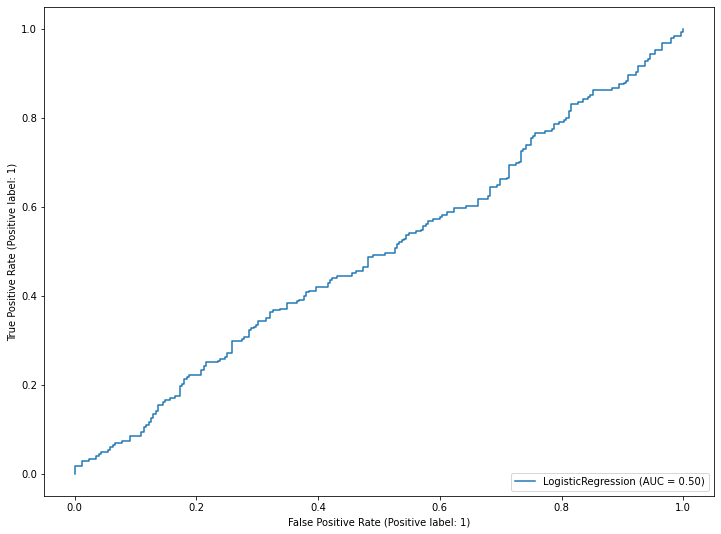

In [58]:
# for reproducibility
RANDOM_SEED = 42
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_roc_curve

# use default parameters
lr = LogisticRegression()

# fit to train set
lr.fit(X_train, y_train)

# plot ROC curve, and show AUC for the validation set
plot_roc_curve(lr, X_val, y_val)

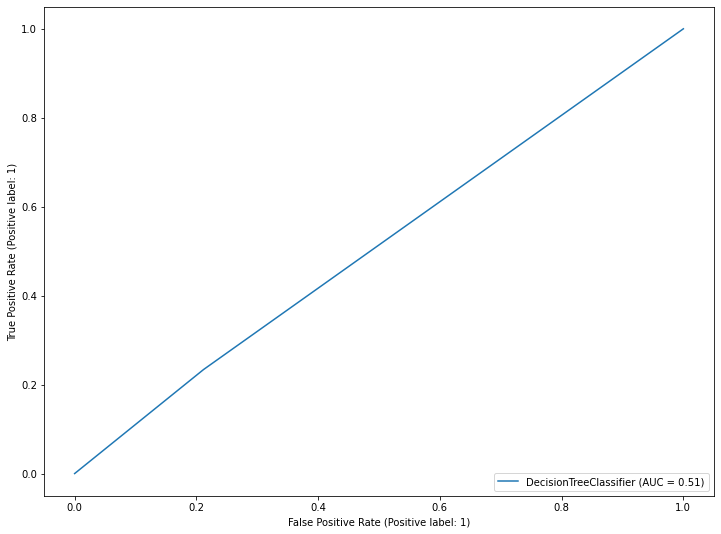

In [59]:
from sklearn.tree import DecisionTreeClassifier

# remember to use the random seed to be able to reproduce the same results
dt = DecisionTreeClassifier(random_state=RANDOM_SEED)
dt.fit(X_train, y_train)

plot_roc_curve(dt, X_val, y_val)

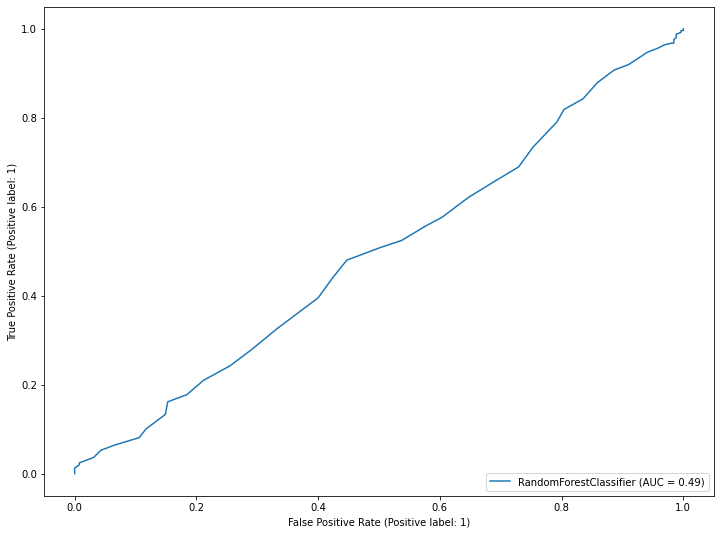

In [60]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=RANDOM_SEED)
rf.fit(X_train, y_train)

plot_roc_curve(rf, X_val, y_val)

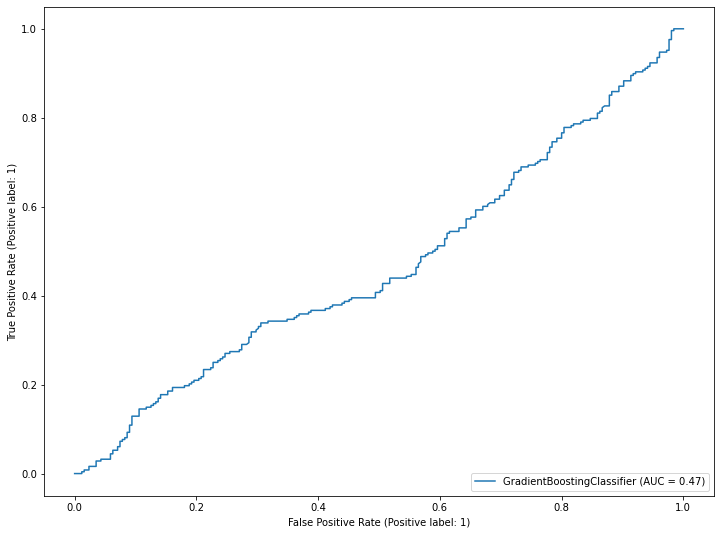

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=RANDOM_SEED)
gb.fit(X_train, y_train)

plot_roc_curve(gb, X_val, y_val)

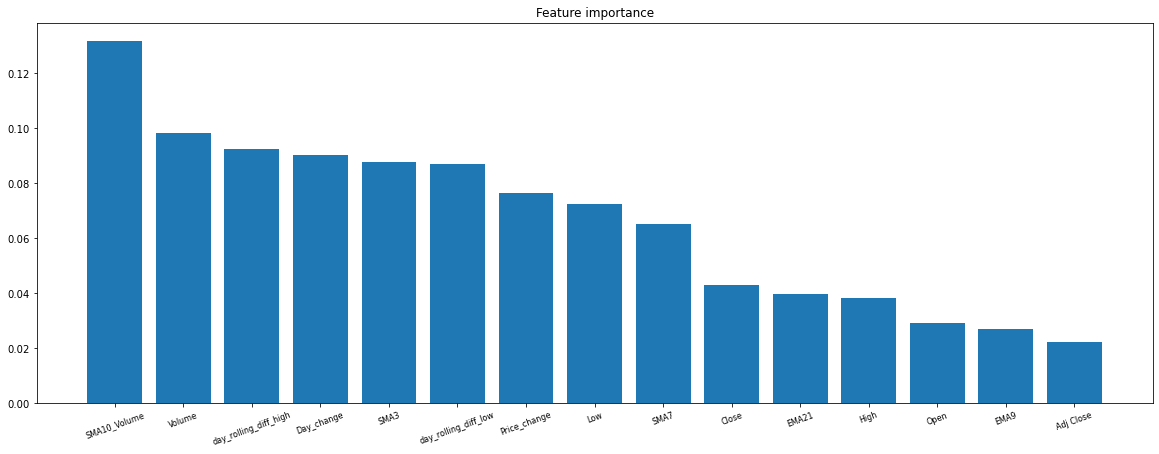

In [62]:
import numpy as np
# Calculate feature importances
importances = gb.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [train[X_cols].columns[i] for i in indices]

_ = plt.figure(figsize=(20, 7))
plt.bar(names, importances[indices])
_ = plt.title("Feature importance")
_ = plt.xticks(rotation=20, fontsize = 8)